In [1]:
# Dependencies
import json
import requests
import pandas as pd
from config import api_key
import random 
import matplotlib.pyplot as plt
from citipy import citipy
import urllib

In [2]:
cities_csv = "worldcities.csv"
cities_df = pd.read_csv(cities_csv)
# cities_df = pd.cities_df1['Latitude']['Longitude']
cities_df.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_list =[]
lat_random = []
lon_random = []
query_url = []
for i in range(1000):
    lat_random.append(random.choice(cities_df['Latitude']))
    lon_random.append(random.choice(cities_df['Longitude']))
    citiname = citipy.nearest_city(float(lat_random[i]), float(lon_random[i])).city_name
    if citiname not in city_list:
        city_list.append(citiname)


In [4]:
len(city_list)
# print(name)
# print(query_url)

771

In [5]:
temp = []
humidity = []
cloud = []
wind = []
lat = []
lon = []
country = []
date = []
maxtemp = []
city_name =[]


for i, city in enumerate(city_list):
    query_url = url +"&appid=" + api_key + "&units="+ units + "&q=" + urllib.request.pathname2url(city)
#     print(query_url)
    try:
        response = requests.get(query_url).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        maxtemp.append(response['main']['temp_max'])
        print(f"Processing Record for {city}")
    except:
        print(f"{city} Not found")
        pass



Processing Record for beira
Processing Record for bereslavka
Processing Record for adre
Processing Record for alghero
wulanhaote Not found
Processing Record for sabha
Processing Record for dzerzhinsk
vrina Not found
Processing Record for edd
Processing Record for palkonda
Processing Record for great yarmouth
maarianhamina Not found
Processing Record for biltine
Processing Record for shache
Processing Record for guasdualito
Processing Record for cabo san lucas
Processing Record for mosbach
Processing Record for cortes
Processing Record for ajaccio
Processing Record for peremyshlyany
Processing Record for pedernales
juifang Not found
Processing Record for san jose
Processing Record for torbay
Processing Record for felanitx
ketchenery Not found
Processing Record for lixourion
Processing Record for javornik
Processing Record for bereda
Processing Record for marabba
Processing Record for quedlinburg
Processing Record for itarema
Processing Record for brunehaut
Processing Record for traverse

Processing Record for marquette
Processing Record for kandava
Processing Record for espanola
Processing Record for wajima
Processing Record for burla
Processing Record for talbahat
Processing Record for balkhash
Processing Record for huntington
Processing Record for buraydah
Processing Record for almaty
Processing Record for zaltan
Processing Record for zlobin
Processing Record for auki
Processing Record for tansen
Processing Record for fatehpur sikri
Processing Record for englewood
Processing Record for banikoara
Processing Record for ordzhonikidze
Processing Record for pignon
Processing Record for kachug
Processing Record for bueu
Processing Record for agadez
Processing Record for nowogard
Processing Record for morant bay
Processing Record for rincon
Processing Record for tervel
Processing Record for dhampur
Processing Record for lesnoy
Processing Record for sistranda
Processing Record for ashta
Processing Record for balabac
Processing Record for carpentras
Processing Record for vera

Processing Record for gyulahaza
Processing Record for constitucion
Processing Record for zary
Processing Record for la sarre
Processing Record for camabatela
Processing Record for starkville
Processing Record for rockland
Processing Record for tignere
Processing Record for flin flon
Processing Record for viisoara
aflu Not found
Processing Record for murray bridge
Processing Record for torquay
Processing Record for kosh-agach
Processing Record for gao
Processing Record for beterou
Processing Record for bondoukou
Processing Record for bhuvanagiri
Processing Record for rheda-wiedenbruck
Processing Record for komnina
Processing Record for ayan
Processing Record for wielun
Processing Record for yurovka
Processing Record for lagos
Processing Record for damietta
Processing Record for kenora
Processing Record for narragansett
Processing Record for sandpoint
Processing Record for el paso
Processing Record for matei
Processing Record for roblin
Processing Record for hoopstad
Processing Record fo

In [6]:
len(maxtemp)


699

In [7]:
dictionary = {
    'cities': city_name,
    'country':country,
    'temp': temp,
    'humidity': humidity,
    'cloud': cloud,
    'wind': wind,    
    'max temp': maxtemp,
    'lat': lat,
    'long': lon
}

weather_data = pd.DataFrame(dictionary)
weather_data.head(10)

,cities,cloud,country,humidity,lat,long,max temp,temp,wind
0,Beira,0,ES,81,43.20,-8.36,51.80,49.89,8.05
1,Bereslavka,48,UA,86,47.89,32.29,35.96,35.96,10.54
2,Adre,0,TD,20,13.47,22.20,67.28,67.28,11.21
3,Alghero,0,IT,76,40.56,8.32,53.60,53.60,6.93
4,Sabha,0,LY,30,27.03,14.43,66.20,66.20,11.21
5,Dzerzhinsk,40,RU,69,56.24,43.46,37.40,37.40,13.42
6,Edd,0,ER,53,13.93,41.69,69.26,69.26,2.71
7,Palkonda,0,IN,98,18.60,83.76,68.22,68.22,3.71
8,Great Yarmouth,88,GB,93,52.61,1.73,48.20,48.20,11.41
9,Biltine,0,TD,18,14.53,20.93,68.81,68.81,11.77


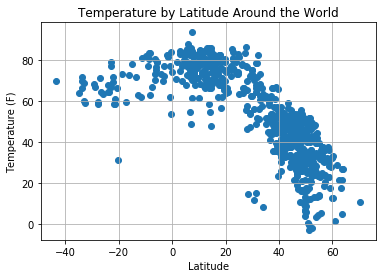

In [12]:
# Create a scatter plot for each data type
plt.scatter(weather_data["lat"],weather_data["temp"], marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Temperature by Latitude Around the World")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure


# Display to screen 

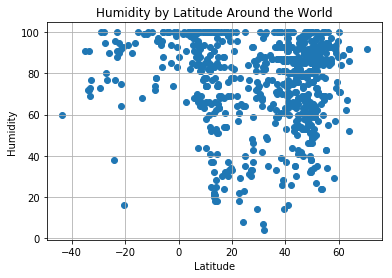

In [9]:
# Create a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Humidity by Latitude Around the World")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure


# Display to screen 


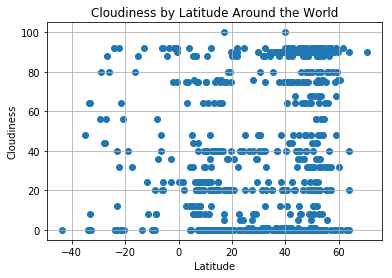

In [10]:
# Create a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloud"], marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Cloudiness by Latitude Around the World")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure


# Display to screen 

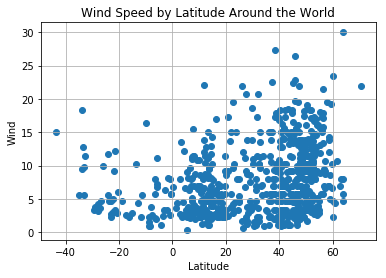

In [11]:
# Create a scatter plot for each data type
wind_lat = plt.scatter(weather_data["lat"], weather_data["wind"],marker="o")

# Incorporate the other graph properties: title and axis labels
plt.title("Wind Speed by Latitude Around the World")
plt.ylabel("Wind")
plt.xlabel("Latitude")

# Turn on the grid
plt.grid(True)

# Save the figure
plt.savefig("wind_lat.png", format="png")

# Display to screen 